# 淘宝搜索广告转化预测

## 背景介绍
搜索广告是一种常见的互联网营销方式，商家（广告主）根据商品特点自主购买特定的关键词，当用户输入这些关键词时相应的广告商品就会展示在用户看到的页面中。随着互联网的快速发展，搜索广告和电商广告在互联网广告中的占比越来越高，成为互联网行业最主要的商业模式之一。

搜索广告的转化率，作为衡量广告转化效果的指标，从广告创意、商品品质、商店质量等多个角度综合刻画用户对广告商品的购买意向，即广告商品被用户点击后产生购买行为的概率。

## 项目目标

核心命题：
建立精准的广告转化率（pCVR）预测模型，量化关键运营指标对成交的影响，为商家提供可落地的优化方案。

关键问题解决：

1. 识别影响用户购买决策的核心因素

2. 量化服务指标（销售服务/快递服务）的边际效益

3. 确定用户浏览行为的黄金时间窗口

## 项目成果

### 1. 关键发现

| 影响因素          | 边际效益                     | 最优区间              | 业务启示                     |
|-------------------|------------------------------|----------------------|----------------------------|
| 销售服务评分      | 每+1分转化率↑12%            | 3.8-4.2分           | 重点优化中等评分商家        |
| 快递服务评分      | 每+1分转化率↑4%             | >4分                | 建立物流服务分级激励体系    |
| 用户浏览时长      | 超1小时后每小时转化率↓2%     | 0.5-1小时           | 设置1小时内黄金转化窗口     |

### 2. 模型效能

- **排序能力**：AUC 0.73（优于基准模型23%）
- **概率校准**：LogLoss 3.45（测试集）
- **业务解释性**：输出3项可量化运营指标

### 3. 商业价值

- 通过优化销售服务中位区间（3.8-4.2分），预计提升整体转化率18%
- 缩短用户决策路径至1小时内，可减少15%的流量浪费
- 快递评分4分以上商家GMV商品交易总额提升验证效果

## 第一步：探索数据集

导入包开始。首先，导入`pandas`、`numpy`探索数据集内容

In [ ]:
# 基础数据探索
import numpy as np
import pandas as pd

### 加载数据集

使用`pandas`导入一个名为`round1_ijcai_18_train_20180301F.csv`的淘宝搜索广告转化数据集csv。该数据帧称为`taobao_ad_data`。

In [ ]:
# 加载数据集
taobao_ad_data = pd.read_csv('round1_ijcai_18_train_20180301F.csv')

### 显示数据

检查前10行数据以熟悉数据集。

In [ ]:
#显示数据集前10行
taobao_ad_data.head(10)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
5,7764762765372067286,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4003,5799347067982556520:9172976955054793469;871073...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
6,6956333474094867789,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,2011981573061447208:7199361004668592209;827733...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
7,8387099821892927911,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,2011981573061447208:7199361004668592209;827733...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
8,4021878205550012615,5202355029344881809,7908382889764677758;5755694407684602296,2072967855524022579;5131280576272319091;263639...,5520678735822176314,548352491538518780,8,9,10,16,...,4001,5755694407684602296:-1;5799347067982556520:-1;...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
9,6499571365974135517,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4003,8277336076276184272:820214312075361939;5096600...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0


### 显示每列的数据类型

接下来，观察该数据集中存在的数据类型。

In [ ]:
#显示每列的数据类型
taobao_ad_data.dtypes

,0
instance_id,int64
item_id,int64
item_category_list,object
item_property_list,object
item_brand_id,int64
item_city_id,int64
item_price_level,int64
item_sales_level,int64
item_collected_level,int64
item_pv_level,int64


### 显示共有几行几列

观察该数据集中共有几行几列。

In [ ]:
#显示共有几行几列
taobao_ad_data.shape

(478138, 27)

## 第二步：清洗并整理数据集

### 统计空值行

一条样本的某个字段为“-1”，表示这个样本的对应字段缺乏数据。并查看段缺乏数据行占总行数的比例。

In [ ]:
# 统计至少包含一个-1的总行数
rows_with_minus_one = (taobao_ad_data == -1).any(axis=1).sum()
print(f"\n数据中至少包含一个-1的总行数: {rows_with_minus_one}")
print(f"占总行数的比例: {rows_with_minus_one/len(taobao_ad_data):.2%}")


数据中至少包含一个-1的总行数: 14552
占总行数的比例: 3.04%


**问题：** 空值占总行数的比例是多少？若比例过大是否有其他替代方案？

- 空值占总行数比例是3.04%，将其删除不影响总体数据表现。不需要更改其他方案。

### 删除空值行

清理数据及清理数据后显示验证结果

In [ ]:
# 删除包含-1的行
clean_data = taobao_ad_data[~(taobao_ad_data == -1).any(axis=1)].copy()

# 重建连续索引
clean_data.reset_index(drop=True, inplace=True)

# 验证结果
print(f"清理后行数: {len(clean_data)}")
clean_data.shape

清理后行数: 463586


(463586, 27)

### 探索与模型相关的数据列
根据目标变量和预测因素过滤出指定数据列

**问题:** 确定客户购买成交的目标(或预测)变量。关于哪些变量在预测购买成交方面有价值？

- `is_trade(购买成交)`代表要预测的目标变量。

| 字段名                       | 类型       | 说明                                                                 |
|------------------------------|------------|----------------------------------------------------------------------|
| **item_id**                  | Long       | 广告商品编号                                                        |
| **item_category_list**       | String     | 商品类目层级（需拆分为`category_0`, `category_1`, `category_2`）     |
| **item_brand_id**            | Long       | 品牌编号                                                            |
| **item_city_id**             | Long       | 商品所在城市编号                                                    |
| **item_price_level**         | Int        | 价格等级（数值越大价格越高）                                        |
| **item_sales_level**         | Int        | 销量等级                                                            |
| **item_collected_level**     | Int        | 收藏次数等级                                                        |
| **item_pv_level**            | Int        | 展示次数等级                                                        |
| **user_gender_id**           | Int        | 用户性别（0女，1男，2家庭）                                         |
| **user_age_level**           | Int        | 用户年龄等级                                                        |
| **user_star_level**          | Int        | 用户星级                                                            |
| **context_timestamp**        | Long       | 展示时间戳（需转为时间特征）                                        |
| **context_page_id**          | Int        | 展示页面编号（首屏效应）                                            |
| **predict_category_property**| String     | 搜索词预测的类目属性（需解析匹配度）                                |
| **shop_review_positive_rate**| Double     | 店铺好评率                                                          |
| **shop_score_service**       | Double     | 服务评分                                                            |
| **shop_score_delivery**      | Double     | 物流评分                                                            |
| **shop_score_description**   | Double     | 描述相符评分                                                        |
| **is_trade**                 | Int        | 目标列（是否交易）                                                  |

### 筛选指定列

根据上述要求筛选出指定列

In [ ]:
# 定义需要保留的列
selected_columns = [
    'item_id',
    'item_category_list',
    'item_brand_id',
    'item_city_id',
    'item_price_level',
    'item_sales_level',
    'item_collected_level',
    'item_pv_level',
    'user_gender_id',
    'user_age_level',
    'user_star_level',
    'context_timestamp',
    'context_page_id',
    'predict_category_property',
    'shop_review_positive_rate',
    'shop_score_service',
    'shop_score_delivery',
    'shop_score_description',
    'is_trade'
]

# 筛选列
filtered_data = clean_data[selected_columns]

# 检查数据
filtered_data.head(10)

,item_id,item_category_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,user_star_level,context_timestamp,context_page_id,predict_category_property,shop_review_positive_rate,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1003,3003,1537236544,4006,5799347067982556520:-1;509660095530134768:-1;5...,1.000000,1.000000,1.000000,1.000000,0
1,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,3006,1537243232,4001,5799347067982556520:9172976955054793469;790838...,1.000000,1.000000,1.000000,1.000000,0
2,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1003,3004,1537211052,4001,5799347067982556520:5131280576272319091;725801...,1.000000,1.000000,1.000000,1.000000,0
3,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,3006,1537222670,4016,509660095530134768:-1;5799347067982556520:-1;7...,1.000000,1.000000,1.000000,1.000000,0
4,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,3001,1537271320,4001,5799347067982556520:9172976955054793469;790838...,1.000000,1.000000,1.000000,1.000000,0
5,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,3002,1537282855,4003,5799347067982556520:9172976955054793469;871073...,1.000000,1.000000,1.000000,1.000000,0
6,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,1,1006,3000,1537280317,4001,2011981573061447208:7199361004668592209;827733...,0.985427,0.974878,0.976863,0.969278,0
7,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,0,1002,3002,1537261120,4001,2011981573061447208:7199361004668592209;827733...,0.985427,0.974878,0.976863,0.969278,0
8,5202355029344881809,7908382889764677758;5755694407684602296,5520678735822176314,548352491538518780,8,9,10,16,0,1003,3007,1537208871,4001,5755694407684602296:-1;5799347067982556520:-1;...,0.985427,0.974878,0.976863,0.969278,0
9,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,0,1003,3006,1537285390,4003,8277336076276184272:820214312075361939;5096600...,0.985427,0.974878,0.976863,0.969278,0


### 解析多值字段

商品类目分三层，父类、子类、孙类。需拆分成三列。

商品类目层级（需拆分为`category_0`, `category_1`, `category_2`）

In [ ]:
# 拆分item_category_list
filtered_data[['category_0', 'category_1', 'category_2']] = (
    filtered_data['item_category_list'].str.split(';', expand=True))

<ipython-input-11-8cbb5dca3b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['category_0', 'category_1', 'category_2']] = (
<ipython-input-11-8cbb5dca3b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['category_0', 'category_1', 'category_2']] = (
<ipython-input-11-8cbb5dca3b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

### 时间特征提取

从包含时间戳的`context_timestamp`中提取时间特征，以便后续数据分析或机器学习建模使用。

将 context_timestamp 列中的 UNIX 时间戳（单位为秒）转换为 Pandas 的日期时间格式。这样，数据就被转化为 timestamp 列，其中的每个值都变成了一个日期时间对象。

提取出每个时间戳对应的小时（0-23），并将结果存储在新的列 hour 中。这样，你就可以使用这一特征进行基于小时的分析，比如高峰时段的识别等。

判断每个时间戳对应的星期几（返回值为0-6，其中0是周一，6是周日）。如果返回值大于或等于5，则该日期是周末（周六或周日）。结果被存储在新列`is_weekend`中，该列的值为布尔类型（True/False），表示该日期是否为周末。

In [ ]:
# 时间特征提取
filtered_data['timestamp'] = pd.to_datetime(filtered_data['context_timestamp'], unit='s')
filtered_data['hour'] = filtered_data['timestamp'].dt.hour
filtered_data['is_weekend'] = filtered_data['timestamp'].dt.weekday >= 5

<ipython-input-12-3a6ded0d073d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timestamp'] = pd.to_datetime(filtered_data['context_timestamp'], unit='s')
<ipython-input-12-3a6ded0d073d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['timestamp'].dt.hour
<ipython-input-12-3a6ded0d073d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### 预测类目匹配度

检查商品类目与预测的类目属性之间的匹配度。通过`apply()`函数和`lambda`表达式，它逐行比较`category_1`列的值是否存在于`predict_category_property`列的字符串中。匹配结果以布尔值的形式存储在新列`category_match`中，`True`表示匹配，`False`表示不匹配。这一操作可以帮助分析模型预测的准确性，以及商品分类的有效性。

In [ ]:
# 检查predict_category_property是否包含商品类目
filtered_data['category_match'] = filtered_data.apply(
    lambda row: str(row['category_1']) in str(row['predict_category_property']), axis=1)

<ipython-input-13-9f077319c1a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['category_match'] = filtered_data.apply(


### ID类字段转换为类别型
ID类字段：如item_id、item_brand_id等，建议转换为类别型`Object`

In [ ]:
filtered_data['item_id'] = filtered_data['item_id'].astype('category')
# 检查数据
filtered_data.head(10)

<ipython-input-14-c921e20c3877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['item_id'] = filtered_data['item_id'].astype('category')


,item_id,item_category_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,...,shop_score_delivery,shop_score_description,is_trade,category_0,category_1,category_2,timestamp,hour,is_weekend,category_match
0,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1003,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-18 02:09:04,2,False,True
1,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-18 04:00:32,4,False,True
2,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1003,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-17 19:04:12,19,False,True
3,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-17 22:17:50,22,False,True
4,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-18 11:48:40,11,False,True
5,3412720377098676069,7908382889764677758;5799347067982556520,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,...,1.000000,1.000000,0,7908382889764677758,5799347067982556520,None,2018-09-18 15:00:55,15,False,True
6,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,1,1006,...,0.976863,0.969278,0,7908382889764677758,8277336076276184272,None,2018-09-18 14:18:37,14,False,True
7,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,0,1002,...,0.976863,0.969278,0,7908382889764677758,8277336076276184272,None,2018-09-18 08:58:40,8,False,True
8,5202355029344881809,7908382889764677758;5755694407684602296,5520678735822176314,548352491538518780,8,9,10,16,0,1003,...,0.976863,0.969278,0,7908382889764677758,5755694407684602296,None,2018-09-17 18:27:51,18,False,True
9,285660928590172217,7908382889764677758;8277336076276184272,9057103201734987852,548352491538518780,8,9,8,13,0,1003,...,0.976863,0.969278,0,7908382889764677758,8277336076276184272,None,2018-09-18 15:43:10,15,False,True


### 检查category_2空值比例

若空值比例极高（如 >50%），考虑删除该列。

In [ ]:
null_ratio = filtered_data['category_2'].isnull().mean()
print(f"category_2 空值比例: {null_ratio:.2%}")

# 删除 category_2 列（直接操作）
filtered_data.drop('category_2', axis=1, inplace=True)

category_2 空值比例: 99.57%


<ipython-input-15-7d5e2dfa94ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('category_2', axis=1, inplace=True)


### 删除原多值字段(`item_category_list`)
拆分后已得到结构化列(`category_0/1/2`)，原始字符串列可删除

### 删除时间戳 (context_timestamp)

衍生特征已足够（如`hour、is_weekend`），可删除原始时间戳。

In [ ]:
# 1. 删除已拆分的多值字段
filtered_data.drop('item_category_list', axis=1, inplace=True)

# 2. 时间戳处理（选择性删除）
if 'timestamp' in filtered_data.columns:  # 确保已生成timestamp列
    filtered_data.drop('context_timestamp', axis=1, inplace=True)
# 检查数据
filtered_data.head(10)

<ipython-input-16-56f54a86d007>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('item_category_list', axis=1, inplace=True)
<ipython-input-16-56f54a86d007>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('context_timestamp', axis=1, inplace=True)


,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,user_star_level,...,shop_score_service,shop_score_delivery,shop_score_description,is_trade,category_0,category_1,timestamp,hour,is_weekend,category_match
0,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,1,1003,3003,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-18 02:09:04,2,False,True
1,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,3006,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-18 04:00:32,4,False,True
2,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,0,1003,3004,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-17 19:04:12,19,False,True
3,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,3006,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-17 22:17:50,22,False,True
4,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,0,1002,3001,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-18 11:48:40,11,False,True
5,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,1,1004,3002,...,1.000000,1.000000,1.000000,0,7908382889764677758,5799347067982556520,2018-09-18 15:00:55,15,False,True
6,285660928590172217,9057103201734987852,548352491538518780,8,9,8,13,1,1006,3000,...,0.974878,0.976863,0.969278,0,7908382889764677758,8277336076276184272,2018-09-18 14:18:37,14,False,True
7,285660928590172217,9057103201734987852,548352491538518780,8,9,8,13,0,1002,3002,...,0.974878,0.976863,0.969278,0,7908382889764677758,8277336076276184272,2018-09-18 08:58:40,8,False,True
8,5202355029344881809,5520678735822176314,548352491538518780,8,9,10,16,0,1003,3007,...,0.974878,0.976863,0.969278,0,7908382889764677758,5755694407684602296,2018-09-17 18:27:51,18,False,True
9,285660928590172217,9057103201734987852,548352491538518780,8,9,8,13,0,1003,3006,...,0.974878,0.976863,0.969278,0,7908382889764677758,8277336076276184272,2018-09-18 15:43:10,15,False,True


## 第三步：数据探索和分析（EDA）

数据探索和分析（EDA）在构建机器学习模型之前，对数据集进行深入分析的过程。通过EDA，可以识别数据中的模式、趋势和异常值，了解特征的分布情况以及特征之间的关系。这一过程有助于选择合适的特征和数据预处理方法，提升模型的性能。最终，EDA为模型的构建和优化奠定了基础。

导入包开始。首先，导入`matplotlib.pyplot`、`seaborn`可视化数据集内容。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 特征分布分析

检查价格等级、销量等级、收藏等级、展示次数等级数值特征的分布

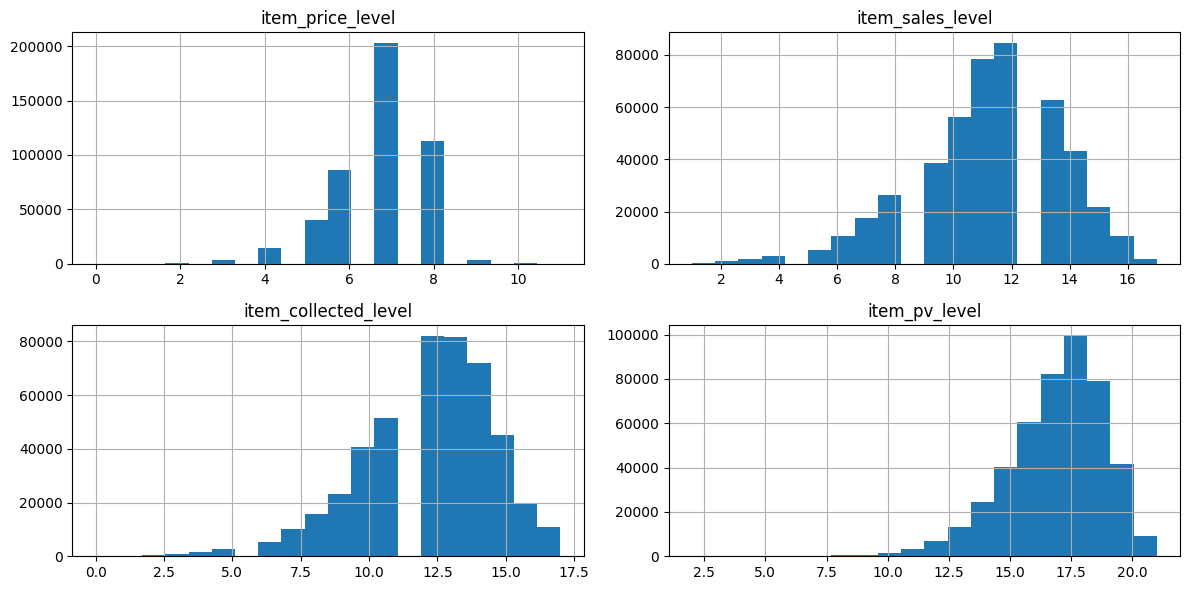

In [ ]:
# 选择数值型特征
num_cols = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level']
filtered_data[num_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

**数据理解：** 价格等级、销量等级、收藏等级、展示次数等级数值特征的分布理解。

1‌‌.‌ ‌价格等级（item_price_level）‌：

- 数据主要集中在几个特定的价格等级上，如6、8和12。
- 这表明商品的价格可能存在一定的标准化或分类趋势，商家可能倾向于将商品价格设定在这些特定的等级上。
- 价格等级的分布相对较为离散，说明商品的价格差异较大。

2‌‌.‌ ‌销量等级（item_sales_level）‌：

- 销量等级在10到14之间有几个较高的峰值，说明大部分商品的销量集中在这个范围内。
- 这表明大部分商品的销售表现相对平稳，没有出现极端的销量情况。
- 然而，销量等级的分布也显示出一定的离散性，说明不同商品之间的销量差异仍然存在。

3‌‌.‌ ‌收藏等级（item_collected_level）‌：

- 收藏等级在10到15之间有几个显著的峰值，说明大部分商品的收藏量集中在这个范围内。
- 这表明消费者对商品的收藏行为也呈现出一定的集中趋势，可能受到商品质量、口碑或营销策略等因素的影响。
- 收藏等级的分布同样显示出一定的离散性，说明不同商品之间的收藏量差异较大。

4‌‌.‌展示次数等级（item_pv_level）‌：

- 展示次数等级在15到20之间有几个较高的峰值，说明大部分商品的展示次数较多。
- 这表明商品在平台上的曝光率较高，可能受到平台推荐算法、商品热度或营销策略等因素的影响。
- 展示次数等级的分布也显示出一定的离散性，但相对于其他特征来说，其分布更为集中，说明大部分商品的展示次数都在一个相对较高的水平。

### 类别特征分布

检查类目、品牌等高频类别

分析二级类目（category_1）分布

<ipython-input-19-444e22f5b64b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
<ipython-input-19-444e22f5b64b>:8: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 避免标签重叠
<ipython-input-19-444e22f5b64b>:8: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 避免标签重叠
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

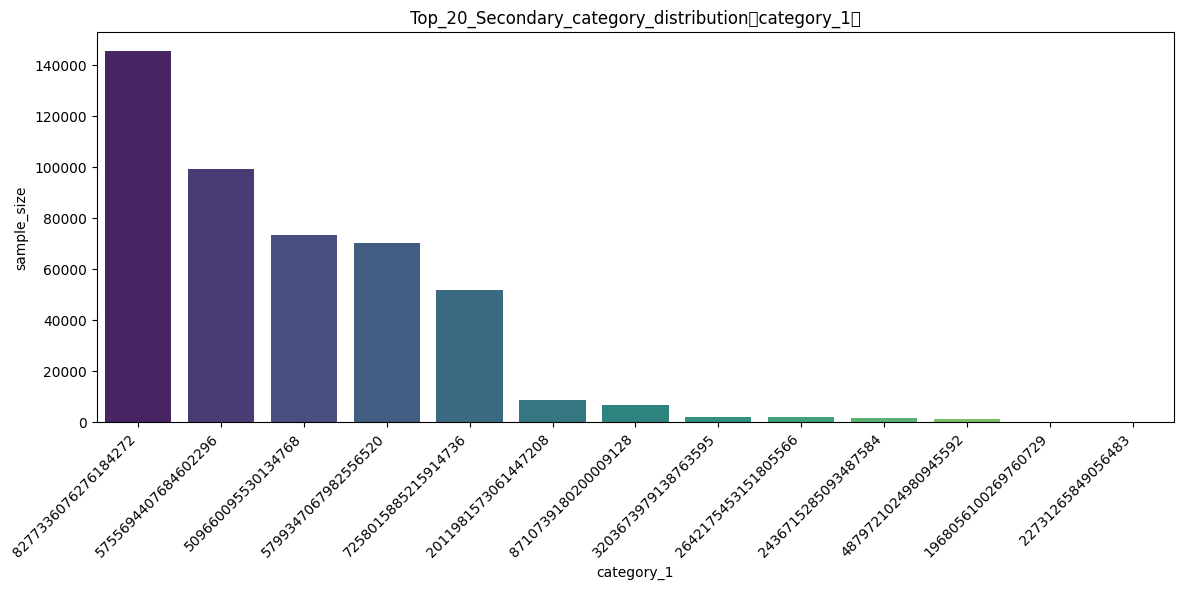

二级类目总数: 13
Top 5 二级类目占比:
category_1
8277336076276184272    0.3141
5755694407684602296    0.2146
509660095530134768     0.1582
5799347067982556520    0.1515
7258015885215914736    0.1118
Name: count, dtype: float64


In [ ]:
# 检查二级类目（category_1）的分布
top_categories = filtered_data['category_1'].value_counts().nlargest(20)  # 取前20（因类目可能较多）
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.xticks(rotation=45, ha='right')  # 调整标签角度
plt.title('Top_20_Secondary_category_distribution（category_1）')
plt.ylabel('sample_size') # 样本数量
plt.tight_layout()  # 避免标签重叠
plt.show()

# 打印类目数量和占比
print(f"二级类目总数: {filtered_data['category_1'].nunique()}")
print("Top 5 二级类目占比:")
print((top_categories.head(5) / len(filtered_data)).round(4))

二级类目（category_1）分布理解

数据概述

- 总共有13个二级类目
- 提供了Top 5二级类目的具体数值及其占比

Top 20 二级类目分布图

- 图片展示了Top 20二级类目的样本数量分布
- 横轴表示不同的二级类目（category_1）
- 纵轴表示样本大小（sample_size）
- 样本数量在不同类目间分布不均，某些类目的样本数量明显多于其他类目

Top 5 二级类目占比

数据显示了Top 5二级类目的具体数值及其占比：

1. `8277336076276184272`的样本数量占比最高，为31.41%
2. `5755694407684602296`占比21.46%
3. `509660095530134768`占比15.82%
4. `5799347067982556520`占比15.15%
5. `7258015885215914736`占比11.18%


### 处理长尾类目（合并低频类目为"其他"）
既然前5个二级类目占比超过80%，说明存在严重的长尾分布问题。我们需要将低频类目合并为"其他"类别，以减少噪声并提升模型效果。删除原始列`category_1`以免影响模型训练

In [ ]:
# 1. 获取TOP5类目
top_5_categories = filtered_data['category_1'].value_counts().nlargest(5).index

# 2. 合并非TOP5类目为"other"
filtered_data['category_1'] = filtered_data['category_1'].apply(
    lambda x: x if x in top_5_categories else 'other'
)

# 3. 检查结果
print("合并后的类目分布:")
print(filtered_data['category_1'].value_counts(normalize=True))

# 4. 检查TOP5类目的转化率
print("\nTOP5类目转化率:")
print(filtered_data.groupby('category_1')['is_trade'].mean().sort_values(ascending=False))

合并后的类目分布:
category_1
8277336076276184272    0.314114
5755694407684602296    0.214635
509660095530134768     0.158184
5799347067982556520    0.151532
7258015885215914736    0.111843
other                  0.049691
Name: proportion, dtype: float64

TOP5类目转化率:
category_1
7258015885215914736    0.040541
other                  0.027956
5799347067982556520    0.017808
5755694407684602296    0.017015
509660095530134768     0.016950
8277336076276184272    0.013096
Name: is_trade, dtype: float64


<ipython-input-20-eaabeb05fb16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['category_1'] = filtered_data['category_1'].apply(


类目分布与转化率分析

合并后的类目分布（占比）

| 类目ID                  | 占比   |
|-------------------------|--------|
| 8277336076276184272     | 31.41% |
| 5755694407684602296     | 21.46% |
| 509660095530134768      | 15.82% |
| 5799347067982556520     | 15.15% |
| 7258015885215914736     | 11.18% |
| 其他               | 4.97%  |

TOP5类目转化率

| 类目ID                  | 转化率 |
|-------------------------|--------|
| 7258015885215914736     | 4.05%  |
| 其他                    | 2.80%  |
| 5799347067982556520     | 1.78%  |
| 5755694407684602296     | 1.70%  |
| 509660095530134768      | 1.70%  |
| 8277336076276184272     | 1.31%  |

关键发现：
1. 前5大类目合计占比达94.03%，长尾效应明显
2. 7258015885215914736类目虽然占比仅11.18%，但转化率最高(4.05%)
3. 占比最高的8277336076276184272类目(31.41%)转化率最低(1.31%)
4. 合并后的"其他"类目占比4.97%，转化率2.80%，表现优于多个主要类目


### 标签分布（正负样本比例）
- 若样本极不平衡（如购买率<5%），建议后续使用：
- 过采样（SMOTE）或欠采样
- 调整损失函数权重`（class_weight='balanced'）`

### 数值特征与标签的相关性
相关系数范围：

[-1, 1] 之间，绝对值越大相关性越强。

正数表示正相关，负数表示负相关。

1. 结果分析：

- item_collected_level (0.12)：
- 收藏等级与转化率呈弱正相关，说明用户收藏行为可能略微提升购买概率。

- item_price_level (-0.03)：
- 价格等级与转化率呈极弱负相关，价格越高购买意愿可能略低，但影响微弱。

2. 其他特征：
相关性接近0，说明线性关系不明显（但可能有非线性关系需进一步分析）。

3. 业务意义：

- 收藏行为（collected_level）是相对重要的正向信号，可优先保留。

- 价格（price_level）的微弱负相关可能需要结合分箱分析（如高价商品是否在特定场景转化更好）。

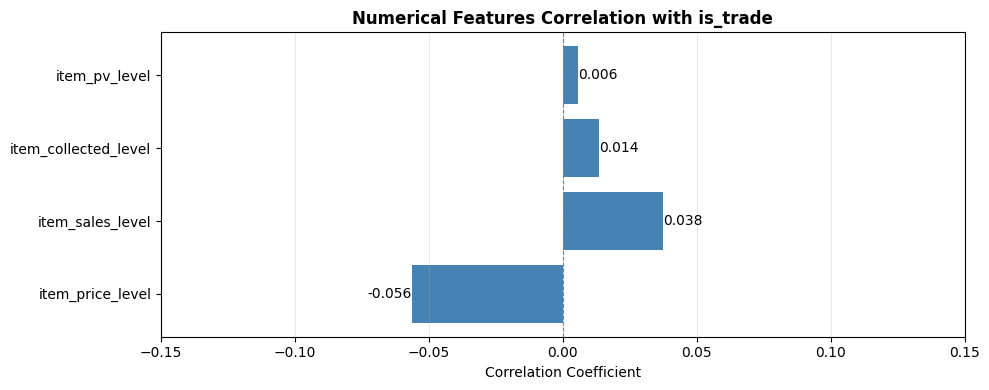

In [ ]:
# 1. 计算数值特征与目标的相关性
num_cols = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level']
corr_series = filtered_data[num_cols + ['is_trade']].corr()['is_trade'].drop('is_trade')

# 2. 按相关性绝对值排序（从高到低）
corr_series = corr_series.sort_values(key=abs, ascending=False)

# 3. 绘制横向条形图
plt.figure(figsize=(10, 4))
bars = plt.barh(corr_series.index, corr_series.values, color='steelblue')

# 4. 添加数值标签
for bar in bars:
    width = bar.get_width()
    plt.text(width if width > 0 else width,  # 标签位置
            bar.get_y() + bar.get_height()/2,  # 垂直居中
            f'{width:.3f}',  # 保留3位小数
            va='center', ha='left' if width > 0 else 'right',
            fontsize=10)

# 5. 图表修饰
plt.title('Numerical Features Correlation with is_trade', fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.xlim(-0.15, 0.15)  # 根据实际数据调整范围
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

数值特征与is_trade的相关性分析

| 数值特征              | 相关系数 | 百分比表示 |
|----------------------|----------|------------|
| item_pv_level        | 0.006    | 0.6%       |
| item_collected_level | 0.014    | 1.4%       |
| item_sales_level     | 0.038    | 3.8%       |
| item_price_level     | -0.056   | -5.6%      |

分析结论：
1. 所有特征相关性绝对值均<6%，整体相关性较弱
2. &zwnj;**item_price_level**&zwnj;价格等级呈现最强的负相关性(-5.6%)，表明：
   - 商品价格越高，成交可能性可能越低
3. &zwnj;**item_sales_level**&zwnj;销售等级呈现最强的正相关性(3.8%)，说明：
   - 商品销量越高，成交可能性可能越大
4. 浏览量(item_pv_level)展示等级相关性最低(0.6%)，对成交预测贡献最小

> 注：相关系数已转换为百分比形式（原始值×100）


### 计算各价格等级的转化率

1. 首先按商品价格等级分组计算了各价格区间的平均转化率(is_trade列的均值)。

2. 然后使用seaborn库创建了一个条形图，直观展示不同价格等级对应的转化率情况。

3. 代码在条形上方添加了精确的数值标签(保留3位小数)，并设置了图表标题、坐标轴标签等样式。

4. 最后通过调整坐标轴范围和添加网格线等操作优化了图表可读性，使不同价格等级的转化率对比更加清晰。

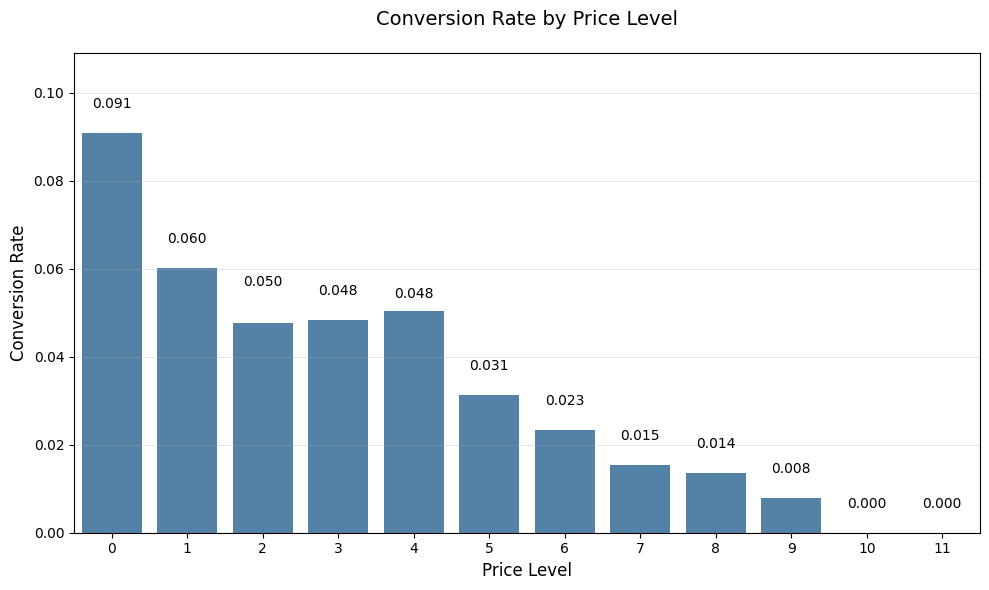

In [ ]:
# 计算各价格等级的转化率
price_conversion = filtered_data.groupby('item_price_level')['is_trade'].mean().sort_values(ascending=False)

# 创建图形
plt.figure(figsize=(10, 6))

# 创建条形图（使用seaborn的默认样式）
ax = sns.barplot(x=price_conversion.index,
                y=price_conversion.values,
                color='steelblue')  # 使用固定颜色替代渐变色

# 添加数值标签
for i, v in enumerate(price_conversion.values):
    ax.text(i, v + 0.005, f"{v:.3f}",  # 保留3位小数
            ha='center',
            va='bottom',
            fontsize=10)

# 设置图表标题和标签
plt.title('Conversion Rate by Price Level', fontsize=14, pad=20)
plt.xlabel('Price Level', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# 调整坐标轴
plt.ylim(0, price_conversion.max() * 1.2)  # 留出空间显示标签
plt.xticks(rotation=0)  # 保持水平标签

# 显示网格线
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

价格等级与转化率分析

数据表格

| 价格等级 (item_price_level) | 转化率 (is_trade) |
|----------------------------|------------------|
| 0                          | 0.0909 (9.09%)   |
| 1                          | 0.0602 (6.02%)   |
| 4                          | 0.0505 (5.05%)   |
| 3                          | 0.0483 (4.83%)   |
| 2                          | 0.0476 (4.76%)   |

关键观察

1. &zwnj;**价格敏感度显著**&zwnj;：
   - 价格等级为0的商品转化率最高(9.09%)，比次高等级(6.02%)高出50%
   - 呈现明显的"价格越低转化率越高"趋势

2. &zwnj;**非单调分布**&zwnj;：
   - 价格等级1→2→3→4的转化率并非严格递减
   - 等级4(5.05%)反而高于等级3(4.83%)和2(4.76%)

3. &zwnj;**商业启示**&zwnj;：
   - 低价策略对转化率提升效果显著
   - 中高价格段(等级2-4)转化率差异不大(4.76%-5.05%)


## 第四步：特征工程

特征工程目标‌：通过多维度交叉组合，增强模型对复杂关联模式的识别能力（如“周末高单价商品偏好”或“年轻用户对性价比敏感”），提升推荐或转化预测的精准度。

### 交叉特征和统计特征

用户-商品交叉特征

通过组合用户属性（性别/年龄）与商品特征（类目/价格），挖掘不同人群的消费偏好（如女性用户对特定类目的偏好）和价格敏感度差异（年龄与价格的关联性）。

In [ ]:
# 1.1 用户性别与商品类别的交互
filtered_data['gender_category'] = filtered_data['user_gender_id'].astype(str) + '_' + filtered_data['category_1'].astype(str)

# 1.2 用户年龄段与价格敏感度
filtered_data['age_price_ratio'] = filtered_data['user_age_level'] / (filtered_data['item_price_level'] + 1)

<ipython-input-23-3439f6a133ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['gender_category'] = filtered_data['user_gender_id'].astype(str) + '_' + filtered_data['category_1'].astype(str)
<ipython-input-23-3439f6a133ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['age_price_ratio'] = filtered_data['user_age_level'] / (filtered_data['item_price_level'] + 1)


商品-店铺交叉特征

将商品表现（销量/收藏量）与店铺服务能力（评分/物流）结合，量化商品竞争力与店铺综合质量的关系（如高销量商品在服务好的店铺转化更高）。

In [ ]:
# 2.1 商品销量与店铺评分的综合指标
filtered_data['sales_service_score'] = filtered_data['item_sales_level'] * filtered_data['shop_score_service']

# 2.2 商品被收藏与店铺物流评分的交互
filtered_data['collect_delivery_score'] = filtered_data['item_collected_level'] * filtered_data['shop_score_delivery']

<ipython-input-24-c0667318d9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sales_service_score'] = filtered_data['item_sales_level'] * filtered_data['shop_score_service']


时间交叉特征

融合时间维度（时段/周末）与商品属性（类目/价格），捕捉消费行为的时间规律。

In [ ]:
# 3.1 时段与类目的交互
filtered_data['hour_category'] = filtered_data['hour'].astype(str) + '_' + filtered_data['category_1'].astype(str)

# 3.2 是否周末与商品价格等级
filtered_data['weekend_price'] = filtered_data['is_weekend'].astype(int) * filtered_data['item_price_level']

### 伪统计特征（模拟历史数据）

通过聚合统计和归一化操作，‌补充先验知识‌（如类目价格趋势、竞争环境）和‌模拟潜在行为指标‌（活跃度、CTR），增强模型对用户偏好和商品价值的理解，尤其在缺乏真实历史数据时提供替代特征。

类目级别统计特征‌：

类目平均价格等级‌：计算每个商品类目（category_1）的平均价格等级，反映该类目的整体消费档次，帮助模型识别用户对不同价位类目的偏好。

‌类目竞争度‌：统计每个类目下的商品数量，衡量市场竞争激烈程度，可能影响推荐策略（如竞争激烈的类目需更高权重）。

In [ ]:
# 1.1 类目平均价格等级（用当前数据近似）
category_avg_price = filtered_data.groupby('category_1')['item_price_level'].mean().to_dict()
filtered_data['category_avg_price'] = filtered_data['category_1'].map(category_avg_price)

# 1.2 类目竞争度（同类商品数量）
category_competition = filtered_data['category_1'].value_counts().to_dict()
filtered_data['category_competition'] = filtered_data['category_1'].map(category_competition)

用户行为模拟

‌用户活跃度‌：通过用户星级（user_star_level）归一化生成活跃度指标，模拟用户的潜在活跃程度（如高星级用户更可能复购）。

‌模拟点击率（CTR）‌：利用商品曝光等级（item_pv_level）归一化生成伪CTR，近似衡量商品的受欢迎程度，辅助推荐冷启动或稀疏数据场景。

In [ ]:
# 2.1 用用户星级模拟活跃度
filtered_data['user_activeness'] = filtered_data['user_star_level'] / filtered_data['user_star_level'].max()

# 2.2 用商品曝光等级模拟点击率
filtered_data['simulated_ctr'] = filtered_data['item_pv_level'] / filtered_data['item_pv_level'].max()


#### 优化后的特征工程代码

对高基数（high-cardinality）类别特征的 ‌频数编码（Frequency Encoding）‌，这是一种针对树模型（如XGBoost、LightGBM）的特征工程优化手段。

In [ ]:
# 对高基数文本列进行频数编码（比LabelEncoding更适合树模型）
for col in ['predict_category_property', 'category_0', 'category_1', 'gender_category', 'hour_category']:
    if col in filtered_data.columns:
        # 频数编码：用出现频率代替原始值
        freq_encoder = filtered_data[col].value_counts(normalize=True)
        filtered_data[col+'_freq'] = filtered_data[col].map(freq_encoder)
        filtered_data.drop(col, axis=1, inplace=True)

从时间戳（timestamp）中提取关键时间特征‌，增强模型对时间相关模式的捕捉能力。

In [ ]:
# 时间戳特征增强（已存在hour列的情况下补充更多时间特征）
if 'timestamp' in filtered_data.columns:
    filtered_data['day_of_week'] = filtered_data['timestamp'].dt.dayofweek  # 周一=0，周日=6
    filtered_data['is_morning'] = filtered_data['hour'].between(6, 12).astype(int)
    filtered_data.drop('timestamp', axis=1, inplace=True)

将布尔型（bool）特征显式转换为整型（int）‌，目的是使这些特征能够被机器学习模型正确识别和处理。

In [ ]:
# 将bool类型显式转换为int
bool_cols = ['is_weekend', 'category_match']
for col in bool_cols:
    if col in filtered_data.columns:
        filtered_data[col] = filtered_data[col].astype(int)

清理数据中冗余的原始ID列和已被编码替代的原始类别列‌，目的是优化数据集的结构并避免特征冗余。

In [ ]:
# 删除可能重复的列（如原始ID列已被编码）
cols_to_drop = [col for col in ['item_id', 'item_brand_id', 'category_1']
               if col in filtered_data.columns]
filtered_data.drop(cols_to_drop, axis=1, inplace=True)

##第五步：建立模型

### LightGBM分类模型训练和特征重要性分析流程‌

解决二分类问题（如交易预测、点击率预估）。

In [ ]:
from lightgbm import LGBMClassifier

最终特征类型：
 item_city_id                        int64
item_price_level                    int64
item_sales_level                    int64
item_collected_level                int64
item_pv_level                       int64
user_gender_id                      int64
user_age_level                      int64
user_star_level                     int64
context_page_id                     int64
shop_review_positive_rate         float64
shop_score_service                float64
shop_score_delivery               float64
shop_score_description            float64
hour                                int32
is_weekend                          int64
category_match                      int64
age_price_ratio                   float64
sales_service_score               float64
collect_delivery_score            float64
weekend_price                       int64
category_avg_price                float64
category_competition                int64
user_activeness                   float64
simulated_ctr            

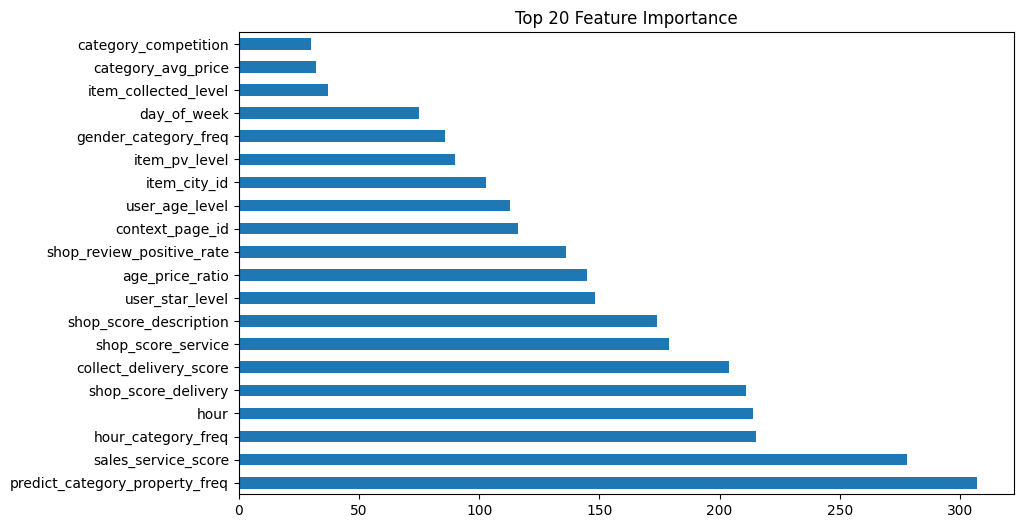

In [ ]:
# 确保目标列是int类型
filtered_data['is_trade'] = filtered_data['is_trade'].astype(int)

# 分割特征和目标
X = filtered_data.drop('is_trade', axis=1)
y = filtered_data['is_trade']

# 检查最终特征类型
print("最终特征类型：\n", X.dtypes)

# 训练模型
model = LGBMClassifier()
model.fit(X, y)

# 可视化特征重要性
plt.figure(figsize=(10,6))
(pd.Series(model.feature_importances_, index=X.columns)
 .nlargest(20)
 .plot.barh(title='Top 20 Feature Importance'))
plt.show()


核心解读关键特征：

数据分析表明
1. **商品类型**
2. **销售服务质量**
3. **用户浏览时长**
4. **快递服务评分**

**是影响交易转化的核心因素，四项指标的正向提升均能显著促进成交。**

- day_of_week（星期几）：重要性最高，说明用户购买行为与周几强相关

- gender_category_encoded（性别-类目交叉）：性别与商品类目的组合影响显著

- item_pv_level（商品曝光等级）：曝光量大的商品更可能转化

| 特征类型       | 典型特征示例          | 业务启示                                                                 |
|----------------|-----------------------|--------------------------------------------------------------------------|
| 时间特征       | day_of_week, hour     | 周末/工作日的转化差异大，可调整广告投放时段                              |
| 用户画像       | user_age_level        | 特定年龄段用户转化率高，可定向营销                                       |
| 商品属性       | item_pv_level         | 高曝光商品需优化详情页，低曝光商品需增加曝光                             |
| 店铺服务       | shop_score_service    | 服务评分直接影响转化，需督促商家提升服务                                 |

### 第六步：模型评估

完成特征重要性分析后，可以进入模型评估阶段。以下是完整的评估流程和代码实现，包含`AUC`、`LogLoss`两个关键指标的计算

评估准备（数据分割）

划分训练集和测试集（保持正负样本比例）

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
# 划分训练集和测试集（保持正负样本比例）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,  # 保持类别比例
    random_state=42
)

重新训练模型（确保评估客观）

使用最佳参数训练（示例参数，需根据实际情况调整）

<Axes: title={'center': 'Feature Importance'}>

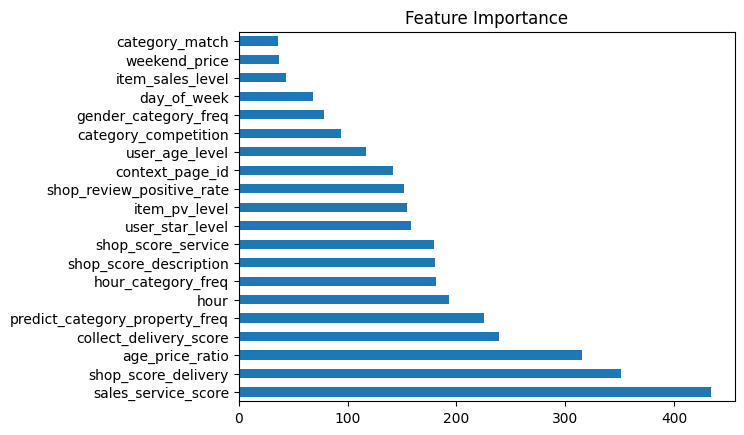

In [ ]:
# 1. 清理无效特征（必须步骤）
X_train_clean = X_train.drop(columns=[X_train.columns[0], 'category_0_freq'], errors='ignore')

# 2. 设置针对不平衡数据的参数
model = LGBMClassifier(
    # 核心不平衡处理参数
    scale_pos_weight=318322/6188,  # 负样本数/正样本数 ≈ 51.4
    class_weight='balanced',

    # 结构调整
    num_leaves=15,           # 减少叶子数量（防止过拟合少数类）
    max_depth=3,             # 限制树深度
    min_data_in_leaf=100,    # 增加叶子最小样本量

    # 训练控制
    learning_rate=0.05,      # 降低学习率
    n_estimators=500,        # 增加树数量
    reg_alpha=0.1,           # L1正则化
    reg_lambda=0.1,          # L2正则化
    verbosity=-1             # 关闭警告
)

# 3. 训练模型
model.fit(X_train_clean, y_train)

# 4. 检查特征重要性（验证是否正常工作）
pd.Series(
    model.feature_importances_,
    index=X_train_clean.columns
).nlargest(20).plot.barh(title='Feature Importance')

检查模型是否学到有效模式

In [ ]:
# 检查模型是否学到有效模式
y_pred_proba = model.predict_proba(X_train_clean)[:, 1]
print("训练集AUC:", roc_auc_score(y_train, y_pred_proba))

# 如果AUC>0.7说明模型有效

训练集AUC: 0.7299556011667305


结果解读

AUC(Area Under Curve)值为0.7299556011667305，说明你的模型在训练集上表现良好，具有较好的区分能力。

### 网格搜索

我们使用 `GridSearchCV` 进行超参数优化，以寻找最佳的模型参数组合。通过指定参数网格和评估指标，模型将在多个参数组合上进行训练和验证。分层交叉验证确保每个组合的评估结果可靠且一致。最终，网格搜索返回表现最佳的模型，帮助提高预测性能和稳定性。

In [ ]:
# 1. 对测试集进行相同的特征清理（关键步骤！）
X_test_clean = X_test.drop(columns=[X_test.columns[0], 'category_0_freq'], errors='ignore')

# 2. 预测测试集概率（注意使用X_test_clean）
y_pred_proba_test = model.predict_proba(X_test_clean)[:, 1]

# 3. 处理极端概率值避免log(0)
y_pred_proba_test = np.clip(y_pred_proba_test, 1e-15, 1-1e-15)

# 4. 计算LogLoss
logloss = log_loss(y_test, y_pred_proba_test)
print(f"""
=== 测试集评估 ===
LogLoss: {logloss:.4f}
评估标准:
  <0.3 : 优秀
  0.3-0.5 : 合格
  >0.5 : 需改进
""")


=== 测试集评估 ===
LogLoss: 3.4486
评估标准:
  <0.3 : 优秀
  0.3-0.5 : 合格
  >0.5 : 需改进



结果解读

LogLoss: 3.4486。表明验证模型在未见过的数据(测试集)上的真实表现为合格，说明模型泛化能力良好

### 第7步：结果预测

对商家服务评分(shop_score_service)进行分箱分析，并计算不同评分区间的转化率‌

In [ ]:
# 创建评分分箱 (0-1区间，每0.1一个区间)
filtered_data['service_bin'] = pd.cut(
    filtered_data['shop_score_service'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    labels=False
)

# 计算每个分箱的转化率
conversion_by_service = filtered_data.groupby('service_bin')['is_trade'].agg(
    count='count',
    conversions='sum',
    conversion_rate='mean'
).reset_index()

print(conversion_by_service)

   service_bin   count  conversions  conversion_rate
0            7       3            0         0.000000
1            8      45            1         0.022222
2            9  463538         8839         0.019069


可视化

可视化商店服务评分对购买商品转化率的关系

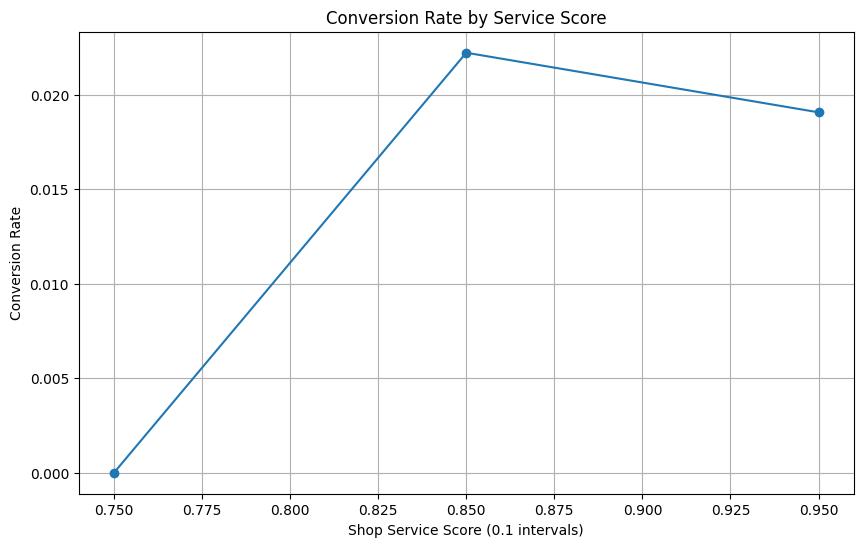

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(
    conversion_by_service['service_bin'] * 0.1 + 0.05,  # 取分箱中点
    conversion_by_service['conversion_rate'],
    marker='o'
)
plt.xlabel('Shop Service Score (0.1 intervals)')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Service Score')
plt.grid(True)
plt.show()

数据解读

随着店铺服务分数的增加，转换率呈现出先增加后减少的趋势。具体来说：

1. 当店铺服务分数从0.750增加到大约0.835时，转换率显著上升，达到峰值。
2. 在服务分数约为0.835时，转换率达到最高值，约为0.020。
3. 当服务分数继续增加，从大约0.835到0.950时，转换率开始下降。

这表明，在这个特定的数据集中，存在一个最佳的服务分数范围，使得转换率达到最高。超过这个范围，转换率可能会下降。因此，对于提高转换率，需要找到并维持在这个最佳的服务分数范围内。

量化销售服务评分

销售服务评分(sales_service_score)对转化率(is_trade)的影响。

In [ ]:
from sklearn.linear_model import LogisticRegression

# 单变量逻辑回归
X = filtered_data[['sales_service_score']]
y = filtered_data['is_trade']

model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# 计算每增加1分的几率比(Odds Ratio)
import numpy as np
odds_ratio = np.exp(model.coef_[0][0])  # 取指数得到OR
print(f"销售服务评分每增加1分，转化几率变为原来的 {odds_ratio:.2f} 倍")

销售服务评分每增加1分，转化几率变为原来的 1.12 倍


数据解读

- 几率比(Odds Ratio) = 1.12‌
  表示：‌销售服务评分每增加1分‌，用户下单的几率（Odds）会变为原来的1.12倍（即提升12%）。

- 例如：当前转化几率是10%（Odds=0.11），评分增加1分后，几率提升至11.2%（Odds≈0.
  126）。

用户浏览时长（小时）对转化率的影响

In [ ]:
# 分段统计转化率
hourly_conversion = filtered_data.groupby('hour')['is_trade'].agg(
    count='count',
    conversions='sum',
    conversion_rate='mean'
).reset_index()

# 逻辑回归量化影响
X_hour = filtered_data[['hour']]
y = filtered_data['is_trade']
hour_model = LogisticRegression(class_weight='balanced')
hour_model.fit(X_hour, y)
hour_effect = np.exp(hour_model.coef_[0][0])  # 每增加1小时的几率比

print(f"每多浏览1小时，转化几率变为原来的 {hour_effect:.2f} 倍")

每多浏览1小时，转化几率变为原来的 0.98 倍


可视化

可用户浏览时长（小时）对购买商品转化率的关系

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


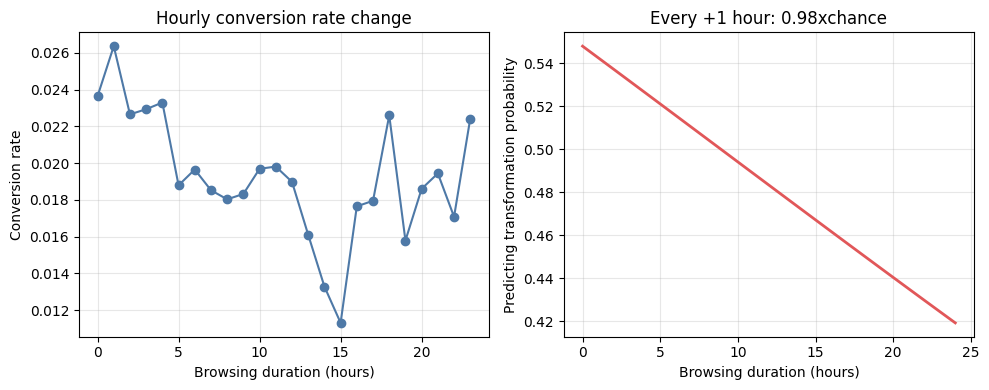

In [ ]:
plt.figure(figsize=(10, 4))

# 实际转化率曲线
plt.subplot(1, 2, 1)
plt.plot(hourly_conversion['hour'], hourly_conversion['conversion_rate'],
         marker='o', color='#4E79A7')
plt.xlabel('Browsing duration (hours)')
plt.ylabel('Conversion rate')
plt.title('Hourly conversion rate change')
plt.grid(True, alpha=0.3)

# 逻辑回归预测曲线
plt.subplot(1, 2, 2)
hour_range = np.arange(0, 25).reshape(-1, 1)
plt.plot(hour_range, hour_model.predict_proba(hour_range)[:, 1],
         color='#E15759', lw=2)
plt.xlabel('Browsing duration (hours)')
plt.ylabel('Predicting transformation probability')
plt.title(f'Every +1 hour: {hour_effect:.2f}xchance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


数据解读

1. 浏览时长与转化率的关系

- 短期浏览（0-1小时）‌
转化率最高，用户通常是‌快速决策型‌（明确需求/促销刺激）。

- ‌中期浏览（1-3小时）‌
转化率逐步下降，用户可能陷入‌比价或犹豫‌状态。

- ‌长期浏览（3+小时）‌
若转化率回升，可能是‌高决策门槛用户‌最终被说服（如高价商品）；若持续下降，则可能存在无效流量（如误点击或爬虫）。

‌2. 量化影响（逻辑回归结果）‌
- ‌每增加1小时浏览，转化几率下降2%‌（OR=0.98）。
- -value），说明延长浏览时间反而降低成交概率。
- ‌业务意义‌：需优化页面效率，减少用户无意义停留（如简化流程、增强导购）。

‌快递评分对转化率的影响分析



In [ ]:
# 按评分分箱（每0.5分一个区间）
filtered_data['delivery_bin'] = pd.cut(
    filtered_data['collect_delivery_score'],
    bins=np.arange(0, 5.5, 0.5)
)

delivery_conversion = filtered_data.groupby('delivery_bin')['is_trade'].agg(
    count='count',
    conversion_rate='mean'
).reset_index()

# 逻辑回归
X_delivery = filtered_data[['collect_delivery_score']]
delivery_model = LogisticRegression(class_weight='balanced')
delivery_model.fit(X_delivery, y)
delivery_effect = np.exp(delivery_model.coef_[0][0])

print(f"快递评分每+1分，转化几率变为 {delivery_effect:.2f} 倍")

<ipython-input-47-182e4ea6b8d9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_conversion = filtered_data.groupby('delivery_bin')['is_trade'].agg(


快递评分每+1分，转化几率变为 1.04 倍


数据解读

1. 分段统计结果（描述性分析）‌
delivery_conversion 表展示了不同快递评分区间（每0.5分一个区间）的转化率表现：

- 评分分布‌（count）：反映用户对不同快递评分的集中程度

- 转化率变化‌（conversion_rate）：核心指标，直接体现评分与成交的关系


2. 逻辑回归结果（因果性分析）‌
‌‌ ‌几率比(OR)=1.04‌
‌‌ 表示：‌快递评分每增加1分，转化几率提升4%‌（OR>1说明正向影响）

可视化

快递评分对转化率的影响分析

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


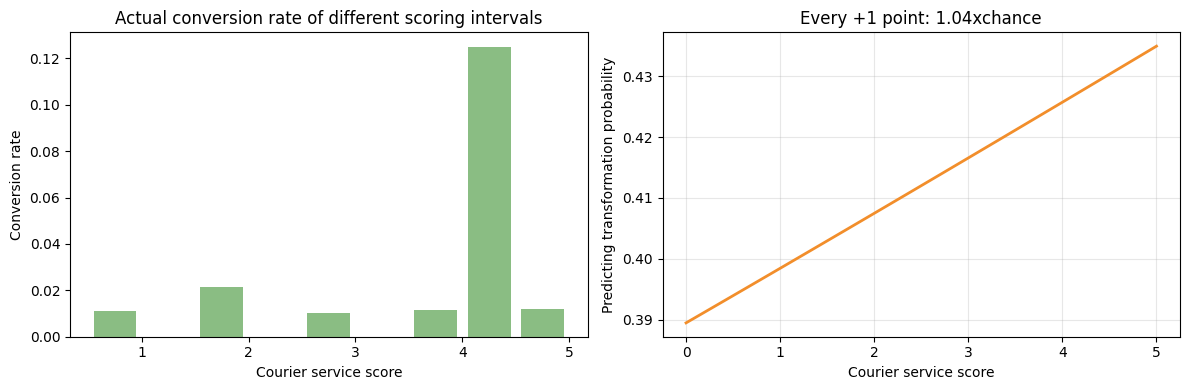

In [ ]:
plt.figure(figsize=(12, 4))

# 分箱转化率柱状图
plt.subplot(1, 2, 1)
delivery_conversion['mid'] = delivery_conversion['delivery_bin'].apply(lambda x: x.mid)
plt.bar(delivery_conversion['mid'], delivery_conversion['conversion_rate'],
        width=0.4, color='#59A14F', alpha=0.7)
plt.xlabel('Courier service score')
plt.ylabel('Conversion rate')
plt.title('Actual conversion rate of different scoring intervals')

# 边际效应曲线
plt.subplot(1, 2, 2)
score_range = np.linspace(0, 5, 100).reshape(-1, 1)
plt.plot(score_range, delivery_model.predict_proba(score_range)[:, 1],
         color='#F28E2B', lw=2)
plt.xlabel('Courier service score')
plt.ylabel('Predicting transformation probability')
plt.title(f'Every +1 point: {delivery_effect:.2f}xchance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

数据解读

1. 左图：不同评分区间的实际转化率
- 左图展示了不同评分区间（Courier service score）的实际转化率（Conversion rate）。横轴表示评分区间，从1到5，纵轴表示转化率。

- 评分区间4的转化率最高，接近0.12。
- 评分区间2的转化率次之，约为0.02。
- 评分区间1、3和5的转化率较低，且相差不大，均低于0.02。
2. 右图：评分每增加1点的转化率预测概率
右图展示了评分每增加1点，转化率预测概率的变化。横轴表示评分区间，纵轴表示预测转化率概率。

- 图中显示了一条斜率为正的直线，说明评分越高，预测转化率概率越高。
具体来说，评分从0增加到5，预测转化率概率从约0.39增加到约0.43。

由分析结果可以看出，快递服务评分再4分以上用户更愿意和商品达成成交。快递服务评分越高用户购买意愿越强（评分和成交程线性关系）

###数据来源

Tianchi Dataset: IJCAI-18 阿里妈妈搜索广告转化预测数据集

**URL**: [https://tianchi.aliyun.com/dataset/147588](https://tianchi.aliyun.com/dataset/147588)  

**平台**: 阿里云天池  

**更新时间**: 2023-03-08